# Read SIMPLE-G output file and generate a plot
# 1. Introduction
The purpose of this file is to read and visualize output from the SIMPLE-G model, focusing on specific variables such as % change in cropland area: "p_qlandcropg". We will visualize the data in several ways, including plotting the range of values and specific global grid IDs. The analysis is performed using various packages such as `HARr`, `terra`, and `RColorBrewer`.
# 2. Read and Install Libraries
First, we ensure that all necessary libraries are installed and loaded for our analysis. These libraries are required to read and manipulate raster data, as well as to create plots.



In [1]:
# Install packages if not already installed
if (!requireNamespace("HARr", quietly = TRUE)) {
  devtools::install_git('https://github.com/USDA-ERS/MTED-HARr.git')
}
if (!requireNamespace("terra", quietly = TRUE)) {
  install.packages("terra")
}
if (!requireNamespace("RColorBrewer", quietly = TRUE)) {
  install.packages("RColorBrewer")
}

# Load the libraries
library(HARr)
library(terra)
library(RColorBrewer)

terra 1.7.46



# 3. Read Files and Set the Variable to Plot

Next, we define the paths to the necessary input files and set the variable we wish to visualize (p_qlandcropg). We read the SIMPLE-G xyg file andefine the a variab to be extractedle for further use.

In [2]:
sol.file = "sgmc3_t150-s1_g2r2.sl4" # change this according to your solution file name

variable = "p_qlandcropg" # select gridded variables, usually ending with "g"

simple_xyg_csv = "simpleg_30m_grid_id_xyg.csv" # File for SIMPLE-G Grid IDs and coordinates

shape_file = "shp/world.shp" # Shape file for world boundaries

# --------------------------------
# Extract the file name for labels
  experiment = gsub("\\.[^.]*$", "",basename(sol.file))

# Check if the directory "png" exists, and create it if not
if (!file.exists("png")) {
  dir.create("png")
  cat("Directory 'png' created.\n")
} else {
  cat("Directory 'png' already exists.\n")
}

# Define the directory path
  png_path <- paste0("png/", experiment)
  
  # Check if the directory exists
  if (!dir.exists(png_path)) {
    # Create the directory if it doesn't exist
    dir.create(png_path)
    cat("Experiment Directory created.\n")
  } else {
    cat("Experiment Directory already exists.\n")
  }


Directory 'png' already exists.
Experiment Directory already exists.


# 4. Read and Convert to Raster

We now convert the SIMPLE-G coordinate data into a raster format. We also set the coordinate reference system (CRS) for the raster.

In [3]:
# Read the SIMPLE-G xyg file containing grid coordinates
simple_xyg_df  = read.csv(simple_xyg_csv, header = T)

# This is the raster with grid IDs of the SIMPLE-G Global model
s  <- rast(simple_xyg_df, type="xyz")
crs(s) = crs(rast(res=1/2))

# Load the shape file for world boundaries
shp = vect(shape_file)

# Read the solution data from the SL4 file
solution_data <- HARr::read_SL4(sol.file)

# Extract specific variables
g_df = as.data.frame(solution_data[[variable]])
  
# Combine the grid IDs with the variable data
g_xyg = cbind(simple_xyg_df[,1:2], g_df)
  
# Create a raster from the combined data
g_ras = rast(g_xyg, type="xyz")

# Set the CRS for the raster
crs(g_ras) = crs(rast(res=1/2))


Warning message in matrix(as.numeric(xyz), ncol = ncol(xyz), nrow = nrow(xyz)):
“NAs introduced by coercion”


# 5. Plot SIMPLE-G IDs

Here, we plot the grid IDs from the SIMPLE-G model along with world boundaries to get an overview of the data.

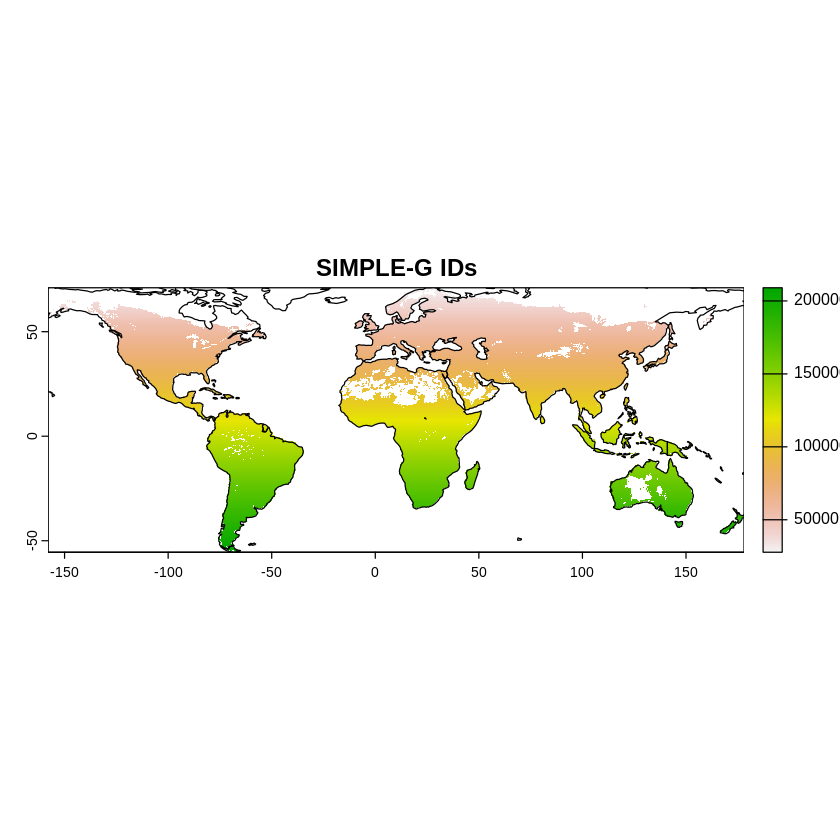

In [4]:
# Plot the SIMPLE-G Grid IDs
plot(s[[1]], main = "SIMPLE-G IDs")
plot(shp, add=T)


# 6. Basic Plot to Inspect the Range

Before applying any color schemes, we plot the raster data directly to inspect the range of values.

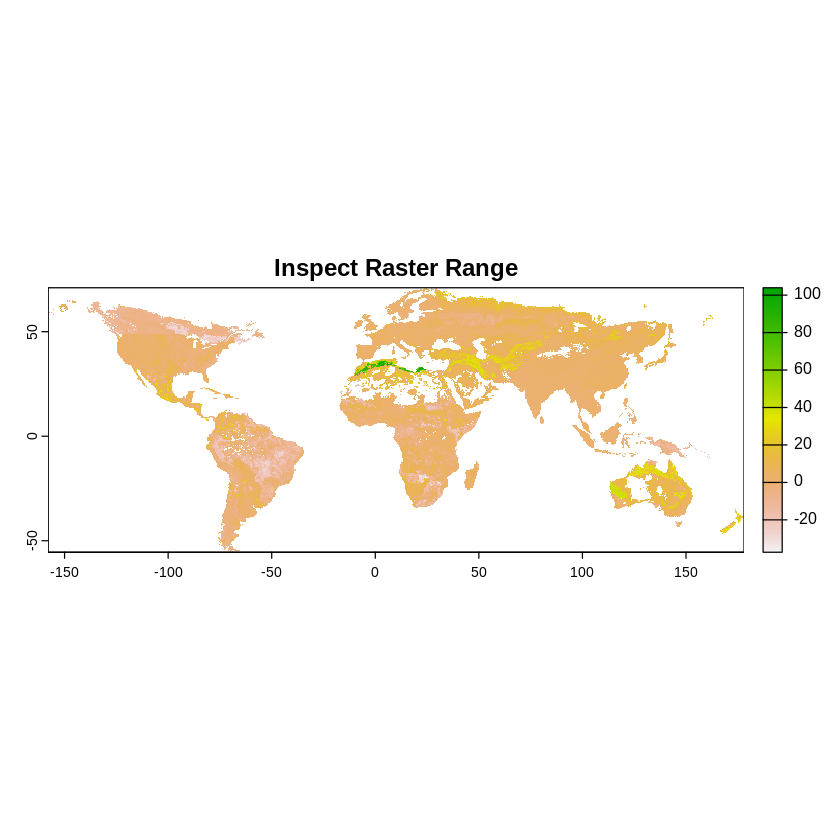

In [37]:
# Basic plot to inspect the range of the raster values
plot(g_ras, , main = "Inspect Raster Range")

# 7. Plot Range from -10 to 10

We now clamp the values of the raster to a range of -10 to 10 and visualize this range with an appropriate color palette. This plot is helpful to inspect the data values within a specific range.

In [39]:
output_file <- paste0(png_path,"/pct_qlandg_range10.png")

plot_ras<- clamp(g_ras, lower = -10, upper = 10, values = TRUE)

# Define color breaks and colors
pct.breaks <- c(-10,-8,-6, -4, -2, 0, 2, 4, 6, 8,+10)
pct.colors <- c(rev(brewer.pal(5, "Blues")), (brewer.pal(5, "Oranges")))

legend.labels <- c( "< -10",-8,-6, -4, -2, 0, 2, 4, 6, 8,"10 >")
legend.cuts = c(-10,-8,-6, -4, -2, 0, 2, 4, 6, 8,+10)  
legend.location = c(-100,100, -70, -60)


  
  #---- plot variable ---
  # Set up the output PNG file
  png(output_file, width = 800, height = 400)  

  plot(plot_ras, 
         main = "", 
         col=pct.colors, 
         axes=F, 
         legend = T,
         range = c(-10,10),
         plg = list(
            ext =legend.location, 
            loc = "bottom",
            title = "",
            cex=2,
            horiz = TRUE,           # horizontal legend
            at = legend.cuts,       # tick positions
            labels = legend.labels  # label values (match cuts)
  ))

    plot(shp, border="black", lwd=1, add=T)
    
    # Add the title to the right side using mtext
    mtext(names(plot_ras)[1], side = 2, line = -1, cex = 2) 
  
  # Save and close the PNG device
  dev.off()


png 
  2

# 8. Plot Range from -100 to 100

Finally, we clamp the raster data to a broader range from -100 to 100 and plot this range to inspect the data over a larger scale.

In [40]:
output_file <- paste0(png_path,"/pct_qlandg_range100.png")

# Define color breaks and colors
pct.breaks <- c(-100,-75,-50, -25, 0, 25, 50, 75,+100)
pct.colors <- c(rev(brewer.pal(4, "Blues")), (brewer.pal(4, "Oranges")))

legend.labels <- c(  "<-100",-75,-50, -25, 0, 25, 50, 75,"+100 >")
legend.cuts = c(-100,-75,-50, -25, 0, 25, 50, 75,+100)  
legend.location = c(-100,100, -70, -60)
  
plot_ras<- clamp(g_ras, lower = -100, upper = 100, values = TRUE)
  
  #---- plot variable ---
  # Set up the output PNG file
  png(output_file, width = 800, height = 400)
  

  plot(plot_ras, 
         main = "", 
         col=pct.colors, 
         axes=F, 
         legend = T,
         range = c(-100,100),
         plg = list(
            ext =legend.location, 
            loc = "bottom",
            title = "",
            cex=2,
            horiz = TRUE,           # horizontal legend
            at = legend.cuts,       # tick positions
            labels = legend.labels  # label values (match cuts)
  ))

    plot(shp, border="black", lwd=1, add=T)

    
    # Add the title to the right side using mtext
    mtext(names(plot_ras)[1], side = 2, line = -1, cex = 2) 
  
  # Save and close the PNG device
  dev.off()


png 
  2

# Summary

In this notebook, we've successfully read and processed SIMPLE-G output data, created raster representations, and visualized the results in multiple ranges. The plots provide insights into the distribution of the variable of interest (p_qlandcropg), both in narrow and broad value ranges. The use of color schemes and legends aids in better interpretation of the data.